In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

import sys
sys.path.append("../game")
from tic_tac_toe import Game, Training, QPlayer

pygame 2.1.2 (SDL 2.0.18, Python 3.10.1)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
def play(p1, p2, random_turn, n):   
    g = Game()    
    state, reward, done = g.reset()
    stats = []
    
    for _ in range(n):    
        while not done:
            if random_turn == 0:
                action = p1.select_action(state, g.actions(), 1)  # if epsilon is 1 then we get random actions
            else:
                if g.current_player() == 1:
                    if random_turn == 2:
                        action = p1.select_action(state, g.actions(), 1)
                    else: 
                        action = p1.select_action(state, g.actions(), 0)                            
                else:
                    if random_turn == 1:
                        action = p2.select_action(state, g.actions(), 1)
                    else: 
                        action = p2.select_action(state, g.actions(), 0) 
                    
            state, reward, done = g.step(action)
        
        stats.append(g.get_winner(reward))
        state, reward, done = g.reset()
        
    return stats


In [3]:
# Train on a different number of games and look at the results from 10000 games
n = 10000
games_list = np.logspace(1, 4.7, num=200, dtype="int")
games_list = np.unique(games_list)
results = ([],  # RandomPlayer vs. RandomPlayer
           [],  # QPlayer vs. RandomPlayer
           [],  # RandomPlayer vs. QPlayer
           [])  # QPlayer vs. QPlayer

t = Training(0.5, 0.5, [1, 0.1, 0.5])
for i in tqdm(range(len(games_list))):
    games = games_list[i]
    t.start(games, False)
    p1, p2 = t.get_agents()
    for k in range(len(results)):
        res = play(p1, p2, k, n)           
        p1_wins = res.count(1) / n
        p2_wins = res.count(2) / n
        draws = res.count(0) / n
        results[k].append([[games, p1_wins, p2_wins, draws]])

100%|██████████| 193/193 [11:29<00:00,  3.57s/it]


<AxesSubplot:title={'center':'RandomPlayer vs. RandomPlayer (Baseline)'}, xlabel='games'>

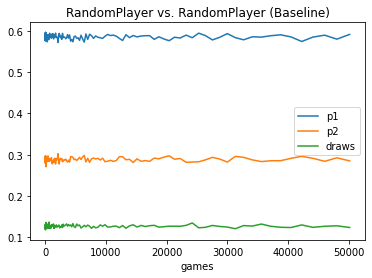

In [4]:
# Plots for RandomPlayer vs. RandomPlayer
qr = pd.DataFrame(np.concatenate(results[0]), columns=["games", "p1", "p2", "draws"])
qr.set_index("games", inplace=True)
qr[["p1", "p2", "draws"]].plot(title="RandomPlayer vs. RandomPlayer (Baseline)")

<AxesSubplot:title={'center':'QPlayer vs. RandomPlayer'}, xlabel='games'>

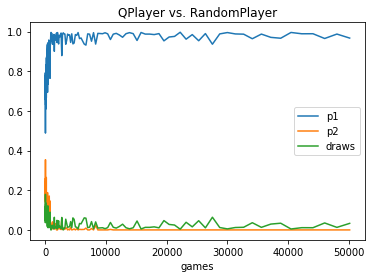

In [5]:
# Plots for QPlayer vs. RandomPlayer
qr = pd.DataFrame(np.concatenate(results[1]), columns=["games", "p1", "p2", "draws"])
qr.set_index("games", inplace=True)
qr[["p1", "p2", "draws"]].plot(title="QPlayer vs. RandomPlayer")

<AxesSubplot:title={'center':'QPlayer vs. RandomPlayer'}, xlabel='games'>

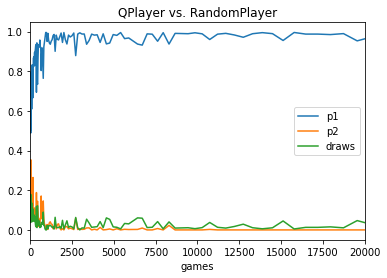

In [6]:
qr[["p1", "p2", "draws"]].plot(title="QPlayer vs. RandomPlayer", xlim=(0, 20000))

<AxesSubplot:title={'center':'RandomPlayer vs. QPlayer'}, xlabel='games'>

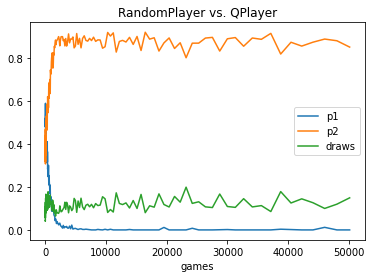

In [7]:
# Plots for RandomPlayer vs. QPlayer
rq = pd.DataFrame(np.concatenate(results[2]), columns=["games", "p1", "p2", "draws"])
rq.set_index("games", inplace=True)
rq[["p1", "p2", "draws"]].plot(title="RandomPlayer vs. QPlayer")

<AxesSubplot:title={'center':'RandomPlayer vs. QPlayer'}, xlabel='games'>

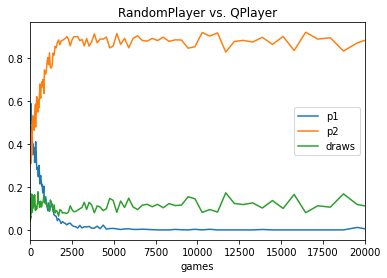

In [8]:
rq[["p1", "p2", "draws"]].plot(title="RandomPlayer vs. QPlayer", xlim=(0, 20000))

<AxesSubplot:title={'center':'QPlayer vs. QPlayer'}, xlabel='games'>

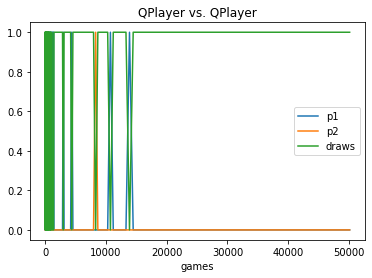

In [9]:
# Plots for QPlayer vs. QPlayer
qq = pd.DataFrame(np.concatenate(results[3]), columns=["games", "p1", "p2", "draws"])
qq.set_index("games", inplace=True)
qq[["p1", "p2", "draws"]].plot(title="QPlayer vs. QPlayer")

<AxesSubplot:title={'center':'QPlayer vs. QPlayer'}, xlabel='games'>

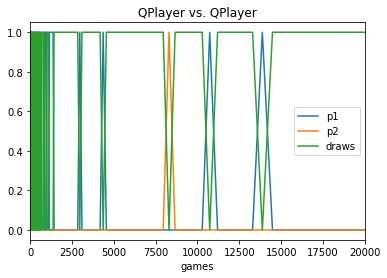

In [10]:
qq[["p1", "p2", "draws"]].plot(title="QPlayer vs. QPlayer", xlim=(0, 20000))